In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([0, 0.1, 0.2, 0.3, 0.4])
y = np.array([5, 2.5, 3, -2.5, -0.2])



5.0  2.5  3.0  -2.5  -0.2  

-25.0  5.0  -55.0  23.0  

150.0  -300.0  390.0  

-1500.0  2300.0  

9500.0  



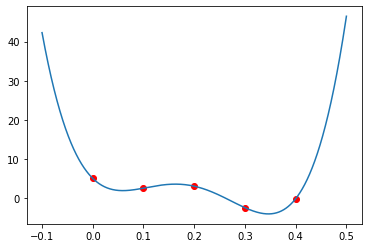

In [3]:
class TableUnit:
    def __init__(self, y, x_left, x_right):
        self.y = y
        self.x_left = x_left
        self.x_right = x_right
        
    def __sub__(self, other):
        result = TableUnit((self.y - other.y) / (self.x_left - other.x_right), self.x_left, other.x_right)
        return result

class Polynom:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.n = len(x)
        self.table = [[float('nan') for i in range(self.n)] for j in range(self.n)]
        for i in range(0, self.n):
            self.table[0][i] = TableUnit(y[i], x[i], x[i])
        

    def divided_difference_table(self):
        for i in range(1, self.n):
            for j in range(0, self.n - i):
                self.table[i][j] = self.table[i - 1][j] - self.table[i - 1][j + 1]
    
    def print_table(self):
        for i in range(0, self.n):
            print("\n")
            for j in range(0, self.n - i):
                print(np.round(self.table[i][j].y, 4), " ", end="")
        print("\n")
                
    def polynom(self, point): 
        s = 0
        for i in range(self.n):
            s += np.product([point - self.x[j] for j in range(i)]) * self.table[i][0].y
        return s

    
    def plot(self, a, b):
        y_s = []
        points = np.linspace(a, b, num=10000)
        for point in points:
            y_s.append(self.polynom(point))
        plt.plot(points, y_s)
        plt.scatter(self.x, self.y, color="r")
        plt.show()


poly = Polynom(x, y)
poly.divided_difference_table()
poly.print_table()
poly.plot(-0.1, 0.5)